In [1]:
print("Jai Maa Kali")

Jai Maa Kali


In [2]:
import pandas as pd

In [4]:
x=pd.read_csv('salaries.csv')

In [5]:
x.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
x.shape

(16, 4)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
categorical_columns=x.select_dtypes(include=['object']).columns.tolist()

In [13]:
categorical_columns

['company', 'job', 'degree']

In [14]:
c=OneHotEncoder(sparse_output=False)

In [17]:
y=c.fit_transform(x[categorical_columns])

In [19]:
z=pd.DataFrame(y,columns=c.get_feature_names_out(categorical_columns))

In [22]:
v=pd.concat([x,z],axis=1)

In [23]:
v.head()

,company,job,degree,salary_more_then_100k,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,google,sales executive,bachelors,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,google,sales executive,masters,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,google,business manager,bachelors,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,google,business manager,masters,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,google,computer programmer,bachelors,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [24]:
x=v.drop(['company','job','degree','salary_more_then_100k'],axis=1)

In [25]:
y=v['salary_more_then_100k']

In [28]:
x=x.drop(['company_abc pharma','job_business manager','degree_bachelors'],axis=1)

In [29]:
x

,company_facebook,company_google,job_computer programmer,job_sales executive,degree_masters
0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0
5,0.0,1.0,1.0,0.0,1.0
6,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn import tree

In [33]:
m=tree.DecisionTreeClassifier()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#,random_state=42)

In [39]:
m.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
m.score(x_test,y_test)

0.25

In [41]:
m.fit(x,y)

DecisionTreeClassifier()

In [43]:
m.score(x,y)

1.0

In [45]:
m.predict([[0,0,0,0,1]])

C:\Users\barad\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [46]:
print("Jai Maa Kali")

Jai Maa Kali


# SVM

In [47]:
#Support Vector Machine

In [48]:
from sklearn.datasets import load_iris

In [49]:
x=load_iris()

In [52]:
x

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:
'''
Gamma is a parameter that determines the width of the kernel function,
and C is a regularization parameter that controls the trade-off between achieving a
good fit to the training data and a simple decision boundary '''

'\nGamma is a parameter that determines the width of the kernel function,\nand C is a regularization parameter that controls the trade-off between achieving a\ngood fit to the training data and a simple decision boundary '

In [55]:
y=pd.DataFrame(x.data,columns=x.feature_names)

In [56]:
y['target']=x.target

In [57]:
y.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [58]:
x.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
y['flower_name']=y.target.apply(lambda z : x.target_names[z])

In [64]:
y.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [66]:
df1=y[y['flower_name']=='setosa']

In [67]:
df2=y[y['flower_name']=='versicolor']
df3=y[y['flower_name']=='virginica']

In [69]:
df1.shape

(50, 6)

In [70]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [71]:
import matplotlib.pyplot as plt

In [72]:
df1.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

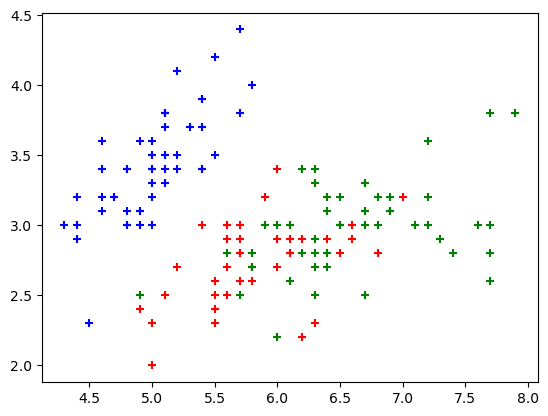

In [80]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='+')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',marker='+')

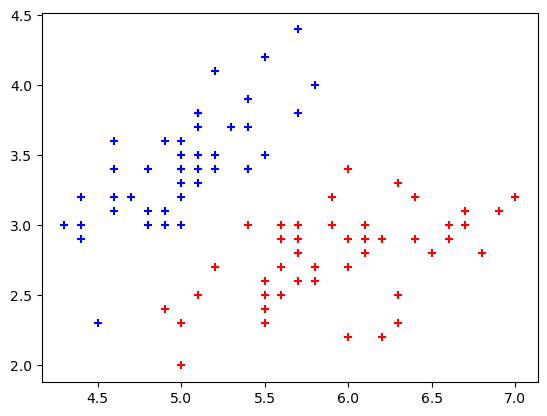

In [81]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='+')

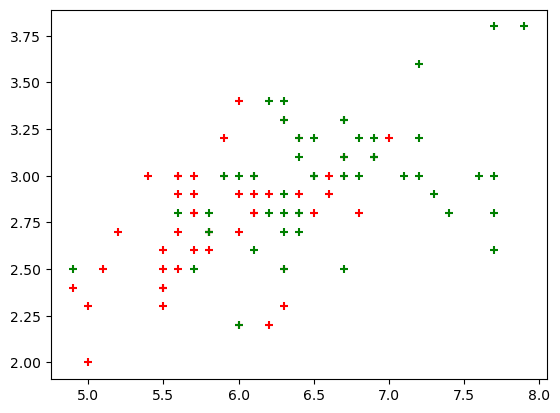

In [82]:
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='+')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',marker='+')

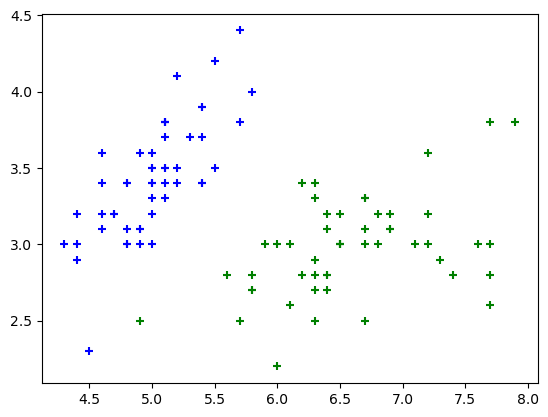

In [83]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',marker='+')

In [85]:
from sklearn.model_selection import train_test_split

In [88]:
y.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [89]:
x=y.drop(['target','flower_name'],axis=1)

In [90]:
z=y['target']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, z, test_size=0.2)

In [92]:
len(X_train)

120

In [94]:
y.shape

(150, 6)

In [99]:
from sklearn.svm import SVC

In [100]:
m=SVC()

In [101]:
m

SVC()

In [103]:
m.fit(X_train,y_train)

SVC()

In [104]:
m.score(X_test,y_test)

1.0

In [106]:
m.predict([[4.8,3.0,1.5,0.3]])

C:\Users\barad\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [113]:
#Regularization is about good fit,how well we divide the dataset
model_C=SVC(C=10000)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [121]:
#gamma is about width
model_g = SVC(gamma=4)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

In [124]:
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

1.0

In [125]:
#parameters are Kernel,Radius Basis Function,Gamma

In [126]:
print("Jai Maa Kali")

Jai Maa Kali
